In [1]:
#u is cone
#z is horizontal
#v is bipolar

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import math
from scipy import signal
from scipy.fftpack import fft
from scipy import ndimage
from scipy import special
%matplotlib inline

In [3]:
def K(x,s):
    return(np.exp(-(x**2/2/s**2)))/s/np.sqrt(2*np.pi)

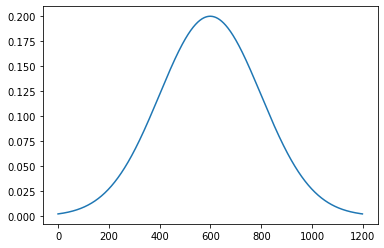

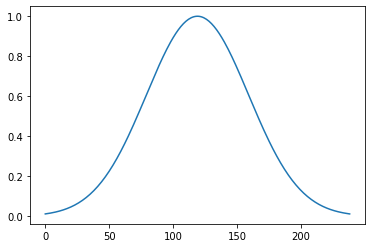

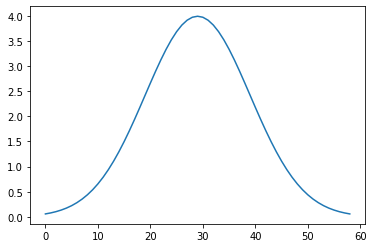

In [4]:
xlen = 2000#spatial extend of simulation
dxc = 20/xlen
sigma_zu = int(2/dxc)#sigma_zu is horizontal cell receptive field
sigma_v = sigma_zu/20#sigma_v is bipolar cell receptive field
sigma_zv = sigma_zu/5#sigma_zv is horizontal to bipolar cell receptive field size

##Spatial kernal for horizontal cell
klen = int(sigma_zu*3)
xx = np.arange(0,klen)
khxs = K(xx,sigma_zu)
KH = np.zeros(klen*2-1)
tmp = khxs[::-1]
KH[0:klen]= tmp[0:klen]/dxc
KH[klen:2*klen]=khxs[1:klen]/dxc
##Spatial kernal for horizontal cell to bipolar cell
klen = int(sigma_zv*3)
xx = np.arange(0,klen)
kzvxs = K(xx,sigma_zv)
Kzv = np.zeros(klen*2-1)
tmp = kzvxs[::-1]
Kzv[0:klen]= tmp[0:klen]/dxc
Kzv[klen:2*klen]=kzvxs[1:klen]/dxc
##Spatial kernal for bipolar cell
klen = int(sigma_v*3)
xx = np.arange(0,klen)
kvxs = K(xx,sigma_v)
KV = np.zeros(klen*2-1)
tmp = kvxs[::-1]
KV[0:klen]= tmp[0:klen]/dxc
KV[klen:2*klen]=kvxs[1:klen]/dxc
plt.figure()
plt.plot(KH)
plt.figure()
plt.plot(Kzv)
plt.figure()
plt.plot(KV)

In [5]:
hw = int(sigma_zu/2)#half of width
dt = 0.001
pos_0 = int(xlen/4)#initial position
pos = pos_0
nstep = 2000
velocity = 300#speed of bar
tau_u = 100#time constant of cone
tau_z = 1.#time constant of horizontal
tau_v = 100#time constant of bipolar
k = 200#Tune stimulus input and horizontal feedback
g = 1#Tune horizontal cell
w = 30#Tune cone input to bipolar
q = 50#Tune horizontal inhibition to bipolar
xx = np.arange(0,xlen)
u = np.zeros(xlen)#cone
z = np.zeros(xlen)#horizontal cell
v = np.zeros(xlen)#bipolar cell
speak = np.zeros(nstep)
upeak = np.zeros(nstep)
vpeak = np.zeros(nstep)
total_u = np.zeros([int(xlen),nstep])#total cones
total_v = np.zeros([int(xlen),nstep])#total bipolar cells
total_rzv = np.zeros([int(xlen),nstep])#total horizontal feedforward inhibition to bipolar
total_ruv = np.zeros([int(xlen),nstep])#total horizontal feedback inhibition to cone
zts = np.zeros([int(xlen),nstep])#horizontal
ss = np.zeros([int(xlen),nstep])#bar

In [6]:
for i in range(nstep):
    pos = pos + velocity*dt
    speak[i] = pos
    s = np.zeros(xlen)#stimulus
    s[int(pos)-hw:int(pos)+hw] = K(np.arange(-hw,hw),sigma_zu*1.5)*250
    ru = np.convolve(u,KH,'same')*dxc # feedback from horizontal cell
    ruv = np.convolve(u,KV,'same')*dxc # input from cone
    rzv = np.convolve(z,Kzv,'same')*dxc # feedforward inhibition from horizontal cell
    duj =(-tau_u*u+k*(s-z))*dt#Cone
    dzj =(-tau_z*z+g*ru)*dt#horizontal
    dvj = (-tau_v*v+(w*ruv-q*rzv))*dt#bipolar
    u = u+duj
    z = z+dzj
    v = v+dvj
    maxpos = np.argmax(u)
    upeak[i]= maxpos
    maxpos = np.argmax(v)
    vpeak[i]= maxpos
    total_u[:,i] = u
    total_v[:,i] = v
    ss[:,i] = s
    zts[:,i] = z
    total_rzv[:,i] = rzv
    total_ruv[:,i] = ruv

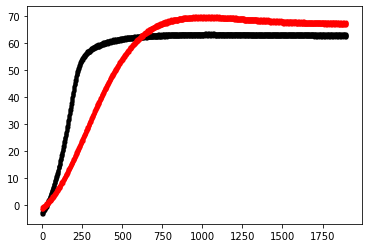

In [7]:
#The distance that cone and bipolar cell precede
plt.plot(vpeak[100:]-speak[100:],'k.')#Bipolar
plt.plot(upeak[100:]-speak[100:],'r.')#Cone
plt.savefig('no_adaptation.jpg')

50


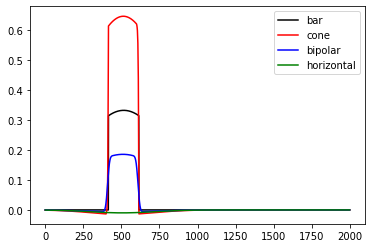

150


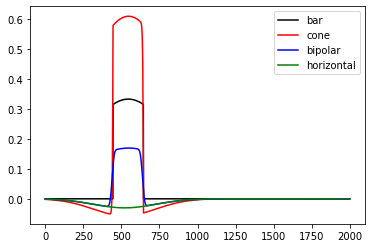

250


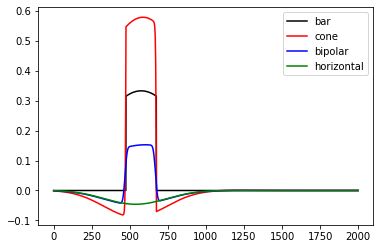

350


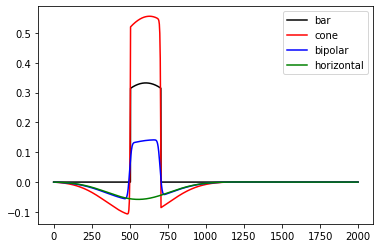

450


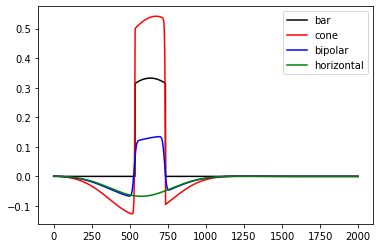

550


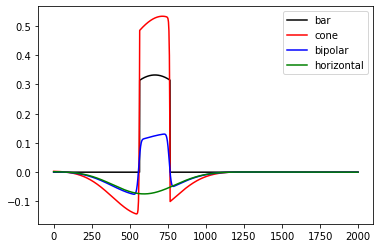

650


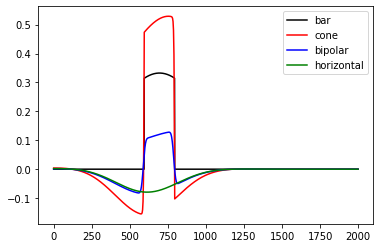

750


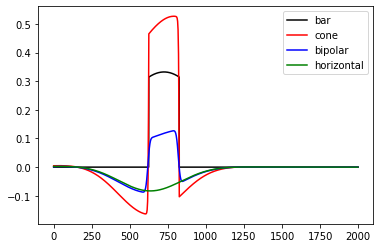

850


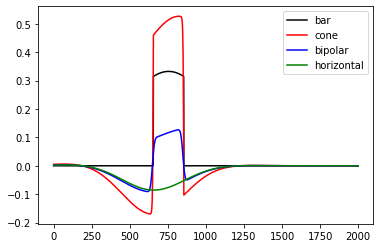

950


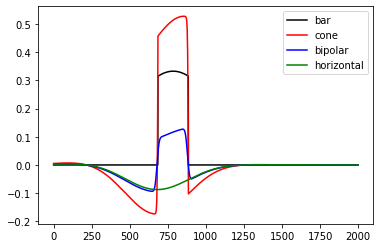

1050


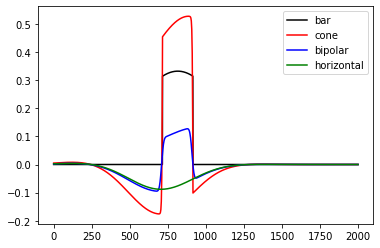

1150


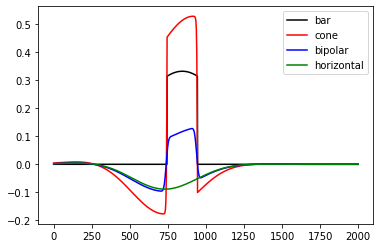

1250


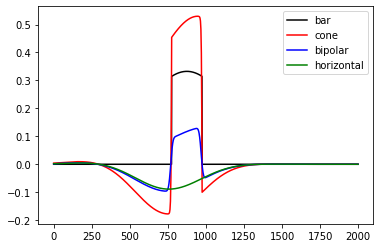

1350


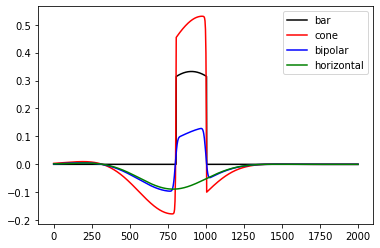

1450


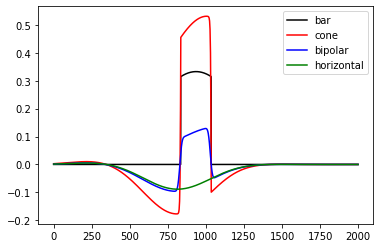

1550


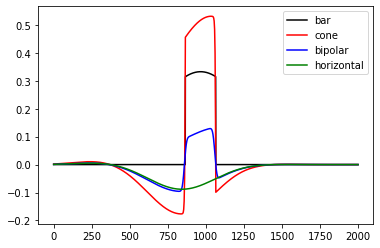

1650


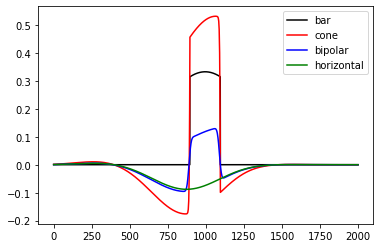

1750


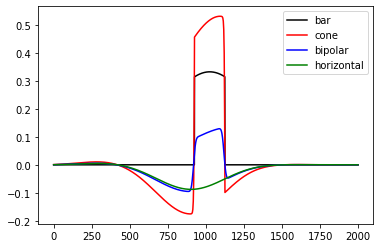

1850


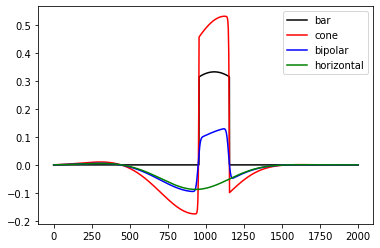

1950


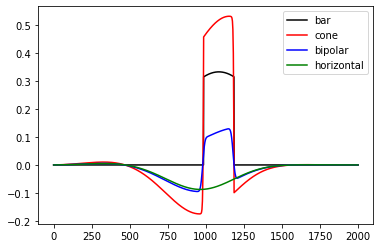

In [8]:
# snapshot at different time
for index in np.arange(50,nstep,100):
    print(index)
    plt.figure()
    plt.plot(xx,ss[:,index],'k',label='bar')#bar
    plt.plot(xx,total_u[:,index],'r',label='cone')#cone
    plt.plot(xx,total_v[:,index],'b',label='bipolar')#bipolar cell
    plt.plot(xx,-zts[:,index],'g',label='horizontal')#horizontal
    #plt.plot(xx,-200*total_rzv[:,index],'y',label='z2v')#horizontal to bipolar
    #plt.plot(xx,w*total_ruv[:,index],'m',label='u2v')#cone to bipolar
    plt.legend()
    plt.show()
    

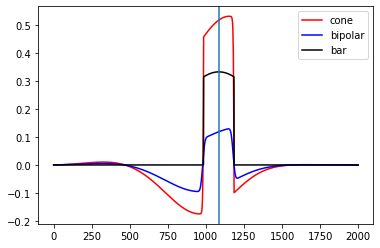

In [9]:
plt.figure()

plt.plot(xx,total_u[:,index],'r',label='cone')#cone
plt.plot(xx,total_v[:,index],'b',label='bipolar')#bipolar cell
#plt.plot(xx,-zts[:,index],'g',label='horizontal')#horizontal
#plt.plot(xx,-200*total_rzv[:,index],'y',label='z2v')#horizontal to bipolar
#plt.plot(xx,w*total_ruv[:,index],'m',label='u2v')#cone to bipolar
plt.plot(xx,ss[:,index],'k',label='bar')#bar
plt.axvline(speak[index])
plt.legend()
plt.savefig('constant_v.jpg')
plt.show()

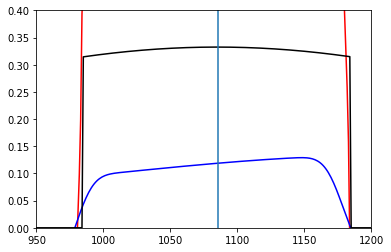

In [12]:
plt.figure()
plt.plot(xx,total_u[:,index],'r',label='cone')#cone
plt.plot(xx,total_v[:,index],'b',label='bipolar')#bipolar cell
plt.plot(xx,ss[:,index],'k',label='bar')#bar
plt.axvline(speak[index])
plt.xlim(950,1200)
plt.ylim(0,0.4)
plt.savefig('small_constant_v.jpg')